In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

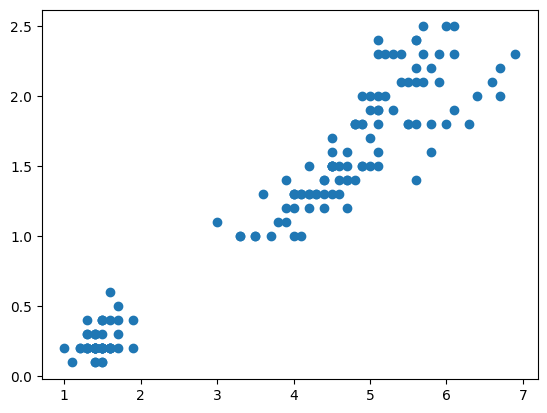

In [3]:
plt.scatter(X[:,0],X[:,1])

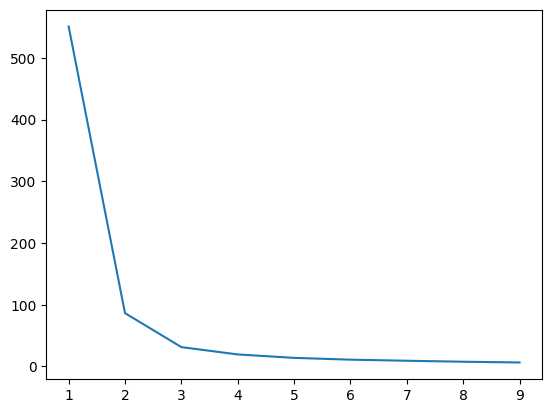

In [4]:
sse = []
k_range = range(1,10)
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.plot(k_range,sse)

In [5]:
mmscaler = MinMaxScaler()
length_scaled = mmscaler.fit_transform(X[:,0,np.newaxis])
width_scaled = mmscaler.fit_transform(X[:,1,np.newaxis])
prediction = pd.DataFrame()
prediction['length'] = length_scaled.flatten()
prediction['width'] = width_scaled.flatten()

In [6]:
km = KMeans(n_clusters=3)
y_prediction = km.fit_predict(prediction[['length','width']])

In [9]:
prediction['cluster'] = y_prediction
score = mean_absolute_error(y, y_prediction)
print(score)

1.28


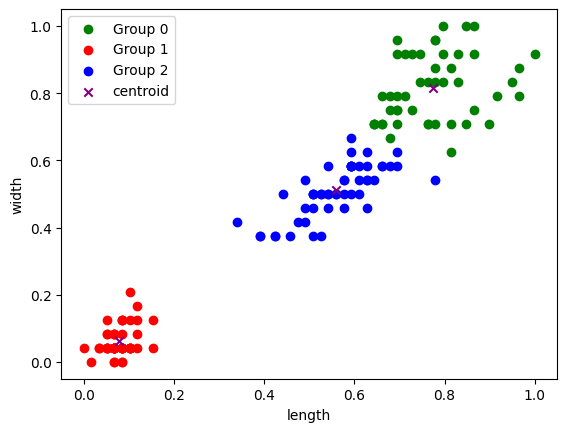

In [8]:
df1 = prediction[prediction.cluster == 0]
df2 = prediction[prediction.cluster == 1]
df3 = prediction[prediction.cluster == 2]
plt.scatter(df1['length'], df1['width'], color = 'green', label='Group 0')
plt.scatter(df2['length'], df2['width'], color = 'red', label='Group 1')
plt.scatter(df3['length'], df3['width'], color = 'blue', label='Group 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='x', label='centroid')
plt.xlabel('length')
plt.ylabel('width')
plt.legend(loc = 'upper left')
plt.show()